# Scikit-Learn

### 1 scikit-learn 是什么

直接来看`sklearn`的官网截图，简洁明了的展示了`sklearn`是用来做什么的：
<center>
<img src="./img/21sklearn_screenshot.png" width=700 height=500></img>
</center>

可以看到`sklearn`为机器学习提供了以下`6`大模块：
- 分类
- 回归
- 聚类
- 维度约减
- 模型选择
- 数据预处理

也可以三大块:

- 数据预处理，比如:
    - 数据标准化(Standardization)/归一化(Normalization)
    - 数据离散化
    - 数据向量化(将标签型数据转换为数字向量)
    - `Imputation`(对缺失值进行填充)
    - 核化(将数据投射到高维空间)
    - 特征的选择
    
- 模型
    - 各种机器学习常见模型
        - 监督学习：
            - 分类： Naive Bayes, 支持向量机, 决策树，集成方法, 神经网络, Gaussian Process
            - 回归：最小二乘回归，Lasso/Ridge回归, 逻辑回归, SVR, 神经网络, Gaussian Process
        - 无监督学习：
            - 聚类：k-means聚类，DBSCAN，混合高斯聚类, 谱聚类 等
            - 维度约减: Pca, LDA, t-SNE
    - 模型参数寻优
- 模型评估
    - 使用各种`score`对模型进行评估：比如:
        - 分类：`accuracy` `recall` `f1` `roc_auc`等
        - 回归：`squared_error`  `r2`等
        - 聚类：`fm_score` `rand_score`等
    - 交叉验证

`sklearn`的接口非常人性化，很容易就可以弄清楚各个函数的作用，并且其模型的**训练/预测数据**一般为`(n_sample, n_feature)`形状的**二维数**组, 模型得到的**标签/回归数值**则是`(n_sample,)`形状的**一维数组**：

大部分情况下，**训练模型**的函数长这样: 

只需要提供一个表示样本特征的`ndarray(n_samples, n_features)`，以及表示各样本标签的`ndarray(n_samples, )`

In [3]:
from sklearn.linear_model import Ridge
print(Ridge.fit.__doc__)

Fit Ridge regression model

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training data

        y : array-like, shape = [n_samples] or [n_samples, n_targets]
            Target values

        sample_weight : float or numpy array of shape [n_samples]
            Individual weights for each sample

        Returns
        -------
        self : returns an instance of self.
        


大部分情况下，使用训练好的模型**预测新数据**的函数长这样:   

由于是预测，自然是返回一个预测好的标签数组啦。

In [4]:
from sklearn.svm import SVC
print(SVC.predict.__doc__)

Perform classification on samples in X.

        For an one-class model, +1 or -1 is returned.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            For kernel="precomputed", the expected shape of X is
            [n_samples_test, n_samples_train]

        Returns
        -------
        y_pred : array, shape (n_samples,)
            Class labels for samples in X.
        


大部分模型都是这么使用的，很多非`sklearn`内置的模型，也实现了这样的接口，比如`xgboost`, 可以与sklearn的交叉验证，模型评估等想结合，甚至你自己的模型都可以整合进来。

### 示例

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      1.00      0.98        49
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        41
           6       1.00      0.98      0.99        49
           7       0.98      0.98      0.98        44
           8       0.98      0.95      0.97        44
           9       0.98      0.98      0.98        46

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99     

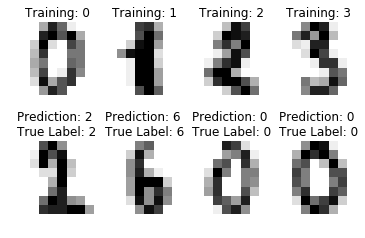

In [6]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
from IPython.utils import io
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# 数据导入， 绘图展示
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
with io.capture_output() as captured:
    for index, (image, label) in enumerate(images_and_labels[:4]):
        plt.subplot(2, 4, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %i' % label)
##############################################################################################
# 以上均不重要

# 数据预处理，划分训练集，测试集
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
train_x, test_x, train_y, test_y = train_test_split(data, digits.target)

# 使用SVC模型, 设置参数, 使用训练集训练模型
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_x, train_y)

# 使用模型预测新数据
predicted_y = classifier.predict(test_x)

# 模型评估
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_y, predicted_y)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, predicted_y))

# 以下均不重要
###########################################################################################

images_and_predictions = list(zip(test_x, predicted_y, test_y))
with io.capture_output() as captured:
    for index, (image, prediction, true_label) in enumerate(images_and_predictions[:4]):
        plt.subplot(2, 4, index + 5)
        plt.axis('off')
        plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Prediction: {} \nTrue Label: {}'.format(prediction, true_label))

plt.show()


看！大约`10`行(主体部分)的代码就能使用一个模型解决我们的问题, 并且准确率那么高(有些字我自己都认不清╯▽╰ )。